In [41]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('ex1').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df.head(20)



,INPUT,OUTPUT
0,1.0,11.0
1,2.0,13.0
2,3.0,15.0
3,4.0,17.0
4,5.0,19.0
5,6.0,21.0
6,7.0,23.0
7,8.0,25.0
8,9.0,27.0
9,10.0,29.0


In [42]:
x=df[['INPUT']].values
y=df[['OUTPUT']].values
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)


In [22]:
scalar=MinMaxScaler()
scalar.fit(x_train)

MinMaxScaler()

In [43]:
x_train1=scalar.transform(x_train)

In [44]:
ai=Sequential([Dense (units = 2, activation = 'relu', input_shape = [1]), Dense (units = 2, activation = 'relu'),Dense (units = 1)])

In [45]:
ai.compile(optimizer='rmsprop',loss='mse')

In [46]:
ai.fit(x_train1,y_train,epochs=10000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 3.3096e-04
Epoch 7502/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3131e-04
Epoch 7503/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3071e-04
Epoch 7504/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3111e-04
Epoch 7505/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3064e-04
Epoch 7506/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.3113e-04
Epoch 7507/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.3069e-04
Epoch 7508/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3127e-04
Epoch 7509/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3095e-04
Epoch 7510/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3151e-04
Epoch 7511/10000
1/1 [==============================] - 0s 13ms/step - loss: 3.3105e-04
Epoch

In [47]:
loss_df = pd.DataFrame(ai.history.history)

<Axes: >

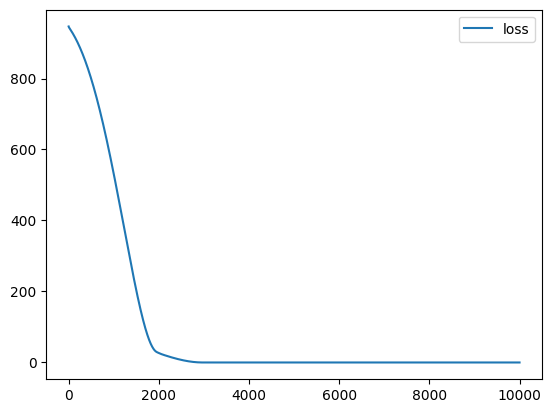

In [48]:
loss_df.plot()

In [49]:
X_test1 = scalar.transform(x_test)

In [50]:
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 107ms/step - loss: 4.7998e-04


0.0004799812159035355

In [51]:

X_n1 = [[10]]

In [52]:
X_n1_1 = scalar.transform(X_n1)

In [53]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 61ms/step


array([[29.017567]], dtype=float32)